In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import numpy as np
import keras

In [2]:
!pip install -q kaggle

In [3]:
!mkdir ~/.kaggle

In [4]:
!cp kaggle.json ~/.kaggle


In [5]:
!kaggle datasets download -d imbikramsaha/paddy-doctor


 99% 1.01G/1.02G [00:17<00:00, 51.9MB/s]
100% 1.02G/1.02G [00:17<00:00, 62.6MB/s]


In [6]:
!unzip /content/paddy-doctor.zip

Streaming output truncated to the last 5000 lines.
  inflating: paddy-disease-classification/train_images/downy_mildew/100992.jpg  
  inflating: paddy-disease-classification/train_images/downy_mildew/100995.jpg  
  inflating: paddy-disease-classification/train_images/downy_mildew/101015.jpg  
  inflating: paddy-disease-classification/train_images/downy_mildew/101020.jpg  
  inflating: paddy-disease-classification/train_images/downy_mildew/101022.jpg  
  inflating: paddy-disease-classification/train_images/downy_mildew/101024.jpg  
  inflating: paddy-disease-classification/train_images/downy_mildew/101034.jpg  
  inflating: paddy-disease-classification/train_images/downy_mildew/101050.jpg  
  inflating: paddy-disease-classification/train_images/downy_mildew/101078.jpg  
  inflating: paddy-disease-classification/train_images/downy_mildew/101096.jpg  
  inflating: paddy-disease-classification/train_images/downy_mildew/101103.jpg  
  inflating: paddy-disease-classification/train_images/dow

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load training data
training_data = keras.preprocessing.image_dataset_from_directory(
    'paddy-disease-classification/train_images/',
    batch_size=70,
    image_size=(240, 240),
    shuffle=True,
    seed=123,
    subset='training',
    validation_split=0.15
)

# Load validation data
validation_data = keras.preprocessing.image_dataset_from_directory(
    'paddy-disease-classification/train_images/',
    batch_size=70,
    image_size=(240, 240),
    shuffle=True,
    seed=123,
    validation_split=0.15,
    subset='validation'
)

# Define the MobileNet model
mobilenet_model = Sequential()
pretrained_mobilenet = MobileNet(weights='imagenet', include_top=False, input_shape=(240, 240, 3), pooling='avg')

# Freeze the layers of the pretrained model
for layer in pretrained_mobilenet.layers:
    layer.trainable = False

# Add layers on top of MobileNet
mobilenet_model.add(pretrained_mobilenet)
mobilenet_model.add(Flatten())
mobilenet_model.add(BatchNormalization())
mobilenet_model.add(Dense(512, activation='relu'))
mobilenet_model.add(BatchNormalization())
mobilenet_model.add(Dense(10, activation='softmax'))

# Compile the model
mobilenet_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = mobilenet_model.fit(training_data, steps_per_epoch=len(training_data), epochs=5,
                               validation_data=validation_data, validation_steps=len(validation_data))

Found 10407 files belonging to 10 classes.
Using 8846 files for training.
Found 10407 files belonging to 10 classes.
Using 1561 files for validation.


17225924/17225924 [==============================] - 0s 0us/step
Epoch 1/5
127/127 [==============================] - 608s 5s/step - loss: 1.1634 - accuracy: 0.6435 - val_loss: 1.0670 - val_accuracy: 0.6720
Epoch 2/5
127/127 [==============================] - 525s 4s/step - loss: 0.4102 - accuracy: 0.8761 - val_loss: 0.6909 - val_accuracy: 0.7822
Epoch 3/5
127/127 [==============================] - 521s 4s/step - loss: 0.2079 - accuracy: 0.9453 - val_loss: 0.5239 - val_accuracy: 0.8392
Epoch 4/5
127/127 [==============================] - 506s 4s/step - loss: 0.1005 - accuracy: 0.9785 - val_loss: 0.4617 - val_accuracy: 0.8571
Epoch 5/5
23/23 [==============================] - 75s 3s/step


AttributeError: '_PrefetchDataset' object has no attribute 'classes'

23/23 [==============================] - 85s 3s/step
Precision: 0.13137138581719732
Recall: 0.13260730301089046
F1 Score: 0.13193718424687714
ROC AUC Score: 0.5106233318657915

Confusion Matrix:
[[ 4  1  0 18  9 11  1 10  9  8]
 [ 5  2  2  7 10  7  5  7 10  4]
 [ 2  2  0 13  6  6  1  5  6  3]
 [ 9 11  4 44 24 47 16 42 53 30]
 [ 6  8  4 22 16 16  9 28 25 17]
 [11  8  8 38 22 40 15 35 37 18]
 [ 3  2  2 14  1 20  3 11 15 10]
 [12  4  5 53 26 30 15 35 37 17]
 [ 9 12  8 48 14 41 15 40 41 30]
 [ 6  3  6 32  9 19  4 24 26 22]]


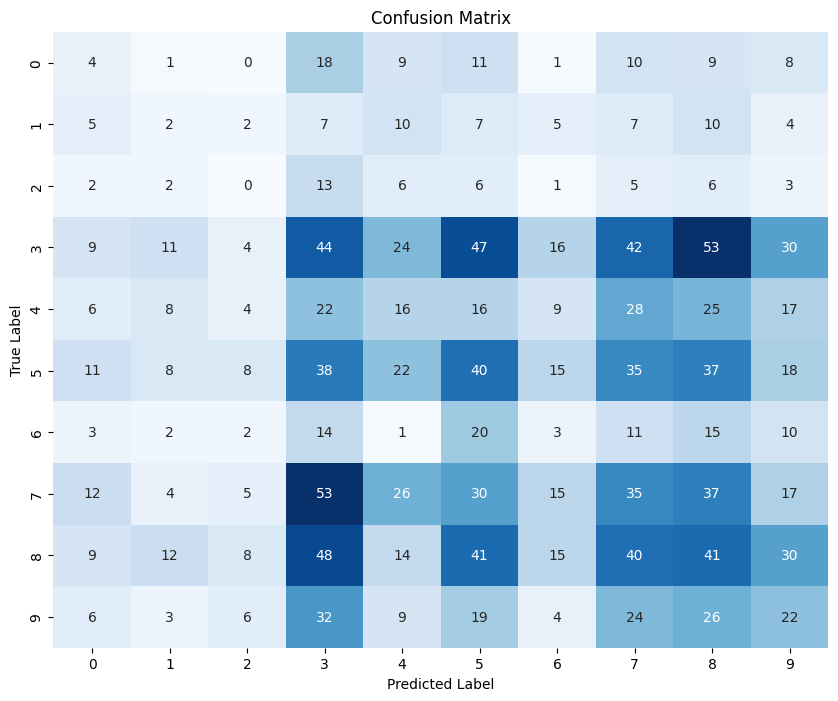

In [8]:
y_pred_prob = mobilenet_model.predict(validation_data)
y_pred = np.argmax(y_pred_prob, axis=1)

# True labels for validation data
y_true = np.concatenate([y for x, y in validation_data], axis=0)

# Calculate and print evaluation metrics
precision = precision_score(y_true, y_pred, average='weighted')
print("Precision:", precision)

recall = recall_score(y_true, y_pred, average='weighted')
print("Recall:", recall)

f1 = f1_score(y_true, y_pred, average='weighted')
print("F1 Score:", f1)

roc_auc = roc_auc_score(y_true, y_pred_prob, multi_class='ovr')
print("ROC AUC Score:", roc_auc)

conf_matrix = confusion_matrix(y_true, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()